Pandas documentation:
https://pd.pydata.org/docs/user_guide/

In [1]:
import numpy as np
import pandas as pd

In [12]:
X = np.random.randint(0, 10, size=(2,3))

In [15]:
df = pd.DataFrame(columns=['A', 'B', 'C'], data=X, index=['c', 'd'])

In [ ]:
df

In [ ]:
df.info()

#### Creating DataFrame

In [32]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns

dates = pd.date_range(start="2020-01-01", periods=6, freq='D')
print(f"dates:\n{dates}\n")

data = np.random.randn(6, 4) # numpy 6x4 matrix
print(f"data:\n{data}\n")

columns = list("ABCD")
print(f"columns:\n{columns}\n")

df = pd.DataFrame(data=data, index=dates, columns=columns)

df

dates:
DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

data:
[[-0.86087821  1.17079966  0.50386145  0.09190618]
 [-0.23275335 -0.96813115 -0.35050377  0.47107622]
 [ 0.76566324 -1.46307868 -0.57760515 -1.01757825]
 [ 0.12329654  1.34416726 -0.23874465 -0.10067936]
 [-1.12521761  1.13895731  0.04014769 -1.13164917]
 [ 1.15476445 -0.23752216  0.97112782  0.54881339]]

columns:
['A', 'B', 'C', 'D']



,A,B,C,D
2020-01-01,-0.860878,1.170800,0.503861,0.091906
2020-01-02,-0.232753,-0.968131,-0.350504,0.471076
2020-01-03,0.765663,-1.463079,-0.577605,-1.017578
2020-01-04,0.123297,1.344167,-0.238745,-0.100679
2020-01-05,-1.125218,1.138957,0.040148,-1.131649
2020-01-06,1.154764,-0.237522,0.971128,0.548813


In [31]:
# Creating a DataFrame by passing a dictionary of objects

df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20200101"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2020-01-01,1.0,3,test,foo
1,1.0,2020-01-01,1.0,3,train,foo
2,1.0,2020-01-01,1.0,3,test,foo
3,1.0,2020-01-01,1.0,3,train,foo


#### Viewing data

In [33]:
df.head(3)

,A,B,C,D
2020-01-01,-0.860878,1.170800,0.503861,0.091906
2020-01-02,-0.232753,-0.968131,-0.350504,0.471076
2020-01-03,0.765663,-1.463079,-0.577605,-1.017578


In [34]:
df.tail(3)

,A,B,C,D
2020-01-04,0.123297,1.344167,-0.238745,-0.100679
2020-01-05,-1.125218,1.138957,0.040148,-1.131649
2020-01-06,1.154764,-0.237522,0.971128,0.548813


In [35]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [36]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [37]:
# df.values
df.to_numpy()

array([[-0.86087821,  1.17079966,  0.50386145,  0.09190618],
       [-0.23275335, -0.96813115, -0.35050377,  0.47107622],
       [ 0.76566324, -1.46307868, -0.57760515, -1.01757825],
       [ 0.12329654,  1.34416726, -0.23874465, -0.10067936],
       [-1.12521761,  1.13895731,  0.04014769, -1.13164917],
       [ 1.15476445, -0.23752216,  0.97112782,  0.54881339]])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2020-01-01 to 2020-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [40]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.029187,0.164199,0.058047,-0.189685
std,0.893444,1.220435,0.581694,0.726898
min,-1.125218,-1.463079,-0.577605,-1.131649
25%,-0.703847,-0.785479,-0.322564,-0.788354
50%,-0.054728,0.450718,-0.099298,-0.004387
75%,0.605072,1.162839,0.387933,0.376284
max,1.154764,1.344167,0.971128,0.548813


#### Operations

In [41]:
df

,A,B,C,D
2020-01-01,-0.860878,1.170800,0.503861,0.091906
2020-01-02,-0.232753,-0.968131,-0.350504,0.471076
2020-01-03,0.765663,-1.463079,-0.577605,-1.017578
2020-01-04,0.123297,1.344167,-0.238745,-0.100679
2020-01-05,-1.125218,1.138957,0.040148,-1.131649
2020-01-06,1.154764,-0.237522,0.971128,0.548813


In [42]:
df.mean()

A   -0.029187
B    0.164199
C    0.058047
D   -0.189685
dtype: float64

In [43]:
df.mean(axis='index') # axis=0

A   -0.029187
B    0.164199
C    0.058047
D   -0.189685
dtype: float64

In [44]:
df.mean(axis='columns') # axis=1

2020-01-01    0.226422
2020-01-02   -0.270078
2020-01-03   -0.573150
2020-01-04    0.282010
2020-01-05   -0.269440
2020-01-06    0.609296
Freq: D, dtype: float64

In [ ]:
# 1) vectorization
df["SUM"] = df[['A', 'B', 'C', 'D']].sum(axis='columns')
print(df)

# 2) using apply
df["SUM"] = df[['A', 'B', 'C', 'D']].apply(lambda row: sum(row), axis='columns')
print(df)

# 3) using iterrows (to be avoided)
for i, row in df[['A', 'B', 'C', 'D']].iterrows():
    row["SUM"] = sum(row)
print(df)


#### Slicing DataFrame

In [48]:
df["A"]

2020-01-01   -0.860878
2020-01-02   -0.232753
2020-01-03    0.765663
2020-01-04    0.123297
2020-01-05   -1.125218
2020-01-06    1.154764
Freq: D, Name: A, dtype: float64

In [54]:
df[["A", "B"]]

,A,B
2020-01-01,-0.860878,1.170800
2020-01-02,-0.232753,-0.968131
2020-01-03,0.765663,-1.463079
2020-01-04,0.123297,1.344167
2020-01-05,-1.125218,1.138957
2020-01-06,1.154764,-0.237522


In [53]:
type(df[["A"]])

pandas.core.frame.DataFrame

In [49]:
type(df["A"])

pandas.core.series.Series

In [50]:
df.loc[:, ["A", "B"]]

,A,B
2020-01-01,-0.860878,1.170800
2020-01-02,-0.232753,-0.968131
2020-01-03,0.765663,-1.463079
2020-01-04,0.123297,1.344167
2020-01-05,-1.125218,1.138957
2020-01-06,1.154764,-0.237522


In [51]:
df.loc["20200101":"20200102", ["A", "B"]] # both endpoints are included

,A,B
2020-01-01,-0.860878,1.170800
2020-01-02,-0.232753,-0.968131


In [55]:
s = df.loc["20200101", ["A", "B"]] # reduction in the dimensions of the returned object: df --> series
print(type(s))
print(s)

<class 'pandas.core.series.Series'>
A   -0.860878
B    1.170800
Name: 2020-01-01 00:00:00, dtype: float64


In [56]:
v = df.loc["20200101", "A"] # reduction in the dimensions of the returned object: df --> cell value
print(type(v))
print(v)

<class 'numpy.float64'>
-0.860878214029938


In [57]:
df[df["A"] > 0]

,A,B,C,D,SUM
2020-01-03,0.765663,-1.463079,-0.577605,-1.017578,-2.292599
2020-01-04,0.123297,1.344167,-0.238745,-0.100679,1.128040
2020-01-06,1.154764,-0.237522,0.971128,0.548813,2.437183


In [58]:
df[df["A"].between(0,1)]

,A,B,C,D,SUM
2020-01-03,0.765663,-1.463079,-0.577605,-1.017578,-2.292599
2020-01-04,0.123297,1.344167,-0.238745,-0.100679,1.128040


In [59]:
filter_index = pd.date_range("20200101", periods=2, freq='2D')
print(filter_index)

df[df.index.isin(filter_index)]

DatetimeIndex(['2020-01-01', '2020-01-03'], dtype='datetime64[ns]', freq='2D')


,A,B,C,D,SUM
2020-01-01,-0.860878,1.170800,0.503861,0.091906,0.905689
2020-01-03,0.765663,-1.463079,-0.577605,-1.017578,-2.292599


#### Setting values

In [60]:
df['E'] = 1

df

,A,B,C,D,SUM,E
2020-01-01,-0.860878,1.170800,0.503861,0.091906,0.905689,1
2020-01-02,-0.232753,-0.968131,-0.350504,0.471076,-1.080312,1
2020-01-03,0.765663,-1.463079,-0.577605,-1.017578,-2.292599,1
2020-01-04,0.123297,1.344167,-0.238745,-0.100679,1.128040,1
2020-01-05,-1.125218,1.138957,0.040148,-1.131649,-1.077762,1
2020-01-06,1.154764,-0.237522,0.971128,0.548813,2.437183,1


In [61]:
df.at["2020-01-01", "E"] = 0

df

,A,B,C,D,SUM,E
2020-01-01,-0.860878,1.170800,0.503861,0.091906,0.905689,0
2020-01-02,-0.232753,-0.968131,-0.350504,0.471076,-1.080312,1
2020-01-03,0.765663,-1.463079,-0.577605,-1.017578,-2.292599,1
2020-01-04,0.123297,1.344167,-0.238745,-0.100679,1.128040,1
2020-01-05,-1.125218,1.138957,0.040148,-1.131649,-1.077762,1
2020-01-06,1.154764,-0.237522,0.971128,0.548813,2.437183,1


In [62]:
df.loc[df['A']>0, 'E'] = 1000

df

,A,B,C,D,SUM,E
2020-01-01,-0.860878,1.170800,0.503861,0.091906,0.905689,0
2020-01-02,-0.232753,-0.968131,-0.350504,0.471076,-1.080312,1
2020-01-03,0.765663,-1.463079,-0.577605,-1.017578,-2.292599,1000
2020-01-04,0.123297,1.344167,-0.238745,-0.100679,1.128040,1000
2020-01-05,-1.125218,1.138957,0.040148,-1.131649,-1.077762,1
2020-01-06,1.154764,-0.237522,0.971128,0.548813,2.437183,1000


#### Missing data

In [63]:
df = pd.DataFrame(
    {
        "col1": ["a", "b", np.nan, 3],
        "col2": [3, np.nan, np.nan, 5],
        "col3": [np.nan, np.nan, np.nan, np.nan]
    }
)

df

,col1,col2,col3
0,a,3.0,NaN
1,b,NaN,NaN
2,NaN,NaN,NaN
3,3,5.0,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    3 non-null      object 
 1   col2    2 non-null      float64
 2   col3    0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 224.0+ bytes


In [65]:
# Warning! np.nan != np.nan
np.nan == np.nan

False

In [ ]:
df[df['col3'].isnull()]

In [66]:
None == None

True

In [70]:
# To get the boolean mask where values are nan
pd.isna(df)

,col1,col2,col3
0,False,False,True
1,False,True,True
2,True,True,True
3,False,False,True


In [71]:
# To replace nan
df.fillna("AAA")

,col1,col2,col3
0,a,3.0,AAA
1,b,AAA,AAA
2,AAA,AAA,AAA
3,3,5.0,AAA


In [72]:
# To drop nan
df.dropna(how="any") # rows with at least one nan

,col1,col2,col3


In [73]:
df.dropna(how="all") # rows with only nan

,col1,col2,col3
0,a,3.0,NaN
1,b,NaN,NaN
3,3,5.0,NaN


#### Merge

In [ ]:
df_left = pd.DataFrame(
    {
        "A": [1,2,3,4],
        "B": [5,6,7,8]
    }
)
print(f'df_left:\n{df_left}\n')

df_right = pd.DataFrame(
    {
        "C": [3,4,5,6],
        "D": [8,8,8,8]
    }
)
print(f'df_right:\n{df_right}\n')

for merge_mode in ['inner', 'left', 'right', 'outer']:
    print(f'merge {merge_mode}:')
    print(df_left.merge(df_right, left_on=['A'], right_on=['C'], how=merge_mode))
    print()

#### Grouping

In [81]:
n_rows = 6
df = pd.DataFrame(
    {
        "Code": np.random.choice(["C1", "C2", "C3"], n_rows),
        "Type": np.random.choice(["good", "bad"], n_rows),
        "Value": np.random.randint(low=1, high=10, size=n_rows)
    }
)

df

,Code,Type,Value
0,C2,good,1
1,C1,good,7
2,C1,bad,8
3,C1,good,2
4,C3,bad,4
5,C2,bad,1


In [82]:
df = df.groupby(by=["Code", "Type"]).sum().reset_index()

In [83]:
df

,Code,Type,Value
0,C1,bad,8
1,C1,good,9
2,C2,bad,1
3,C2,good,1
4,C3,bad,4


In [ ]:
df['Code']

In [85]:
df.groupby(by=["Code"]).sum()

,Value
Code,
C1,17
C2,2
C3,4


In [86]:
df.groupby(by=["Code"]).agg({'Type': ' '.join, 'Value': 'sum'})

,Type,Value
Code,,
C1,bad good,17
C2,bad good,2
C3,bad,4


#### Plotting

https://pandas.pydata.org/docs/user_guide/visualization.html

In [87]:
import matplotlib.pyplot as plt

In [88]:
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range("1/1/2000", periods=1000), columns=list("ABCD"))

In [89]:
df = df.cumsum()

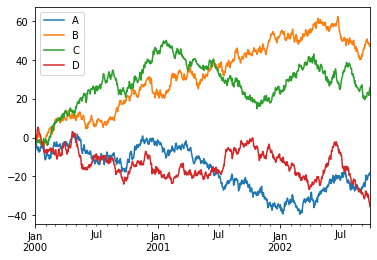

In [90]:
df.plot();

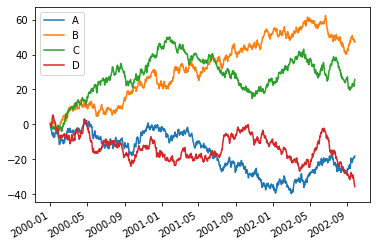

In [91]:
for col in df.columns:
    plt.plot(df.index, df[col], label=f'{col}')

plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

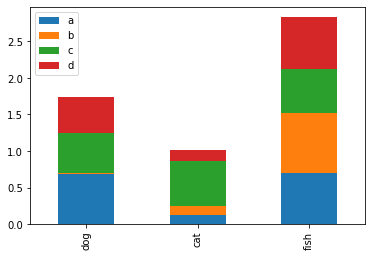

In [92]:
df2 = pd.DataFrame(np.random.rand(3, 4), index=['dog', 'cat', 'fish'], columns=["a", "b", "c", "d"])
df2.plot.bar(stacked=True);

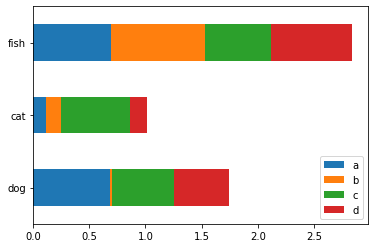

In [93]:
df2.plot.barh(stacked=True);

In [94]:
df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    },
    columns=["a", "b", "c"],
)
#df4

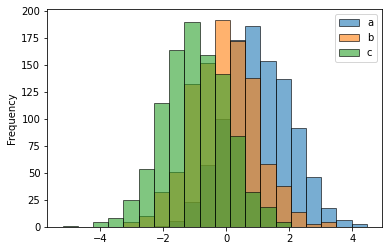

In [95]:
df4.plot.hist(alpha=0.6, bins=20, edgecolor='black');

In [ ]:
df4["a"].plot.hist(orientation="horizontal", cumulative=True, edgecolor='black');

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(df4, alpha=0.2, figsize=(6, 6), diagonal="kde");


'\nIn statistics, kernel density estimation (KDE) is a way \nto estimate the probability density function (PDF) of a random variable.\n'

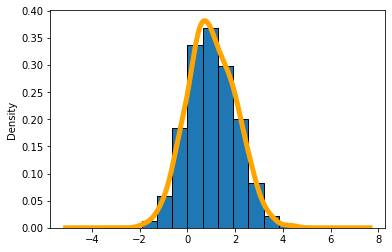

In [96]:
df4['a'].plot.hist(density=True, edgecolor='black');
df4['a'].plot.kde(color='orange', lw=5);
"""
In statistics, kernel density estimation (KDE) is a way 
to estimate the probability density function (PDF) of a random variable.
"""

#### Getting data in/out
https://pandas.pydata.org/docs/reference/io.html